# Clustering 

## Online Shopping Activity

----

#### Dataset Source : UCI Repository( https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)


#### Relevant Papers : 
 Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).(https://doi.org/10.1007/s00521-018-3523-0)
 
 -----
 -----

###### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

###### Importing the dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


###### About the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

###### Description of columns

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

[From UCI Repository]

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

## Exploring the dataset
----

###### Type of Pages Visited 

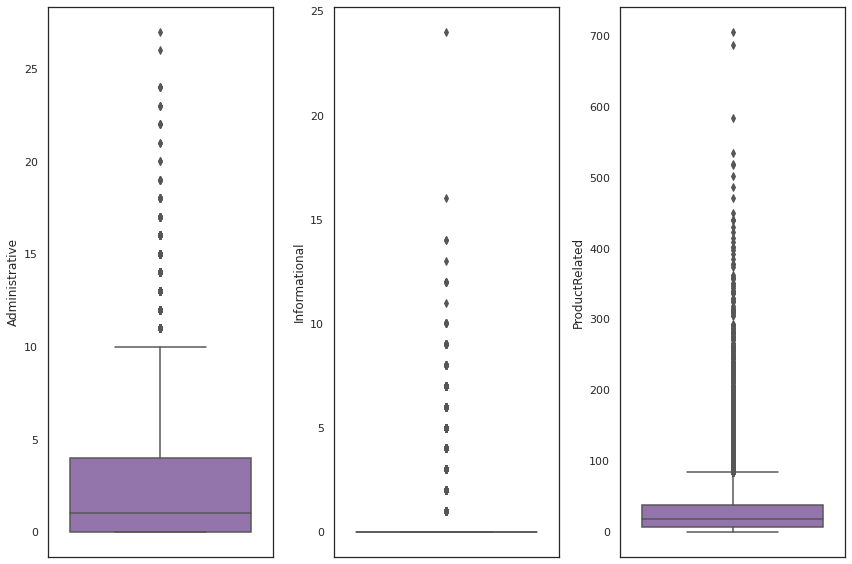

In [7]:
lbl_type = ['Administrative','Informational','ProductRelated']
lbl_dur = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']

sns.set(style="white", palette="muted", color_codes=True)
plt.Figure(dpi=300)
for i in range(0,len(lbl_type)):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[lbl_type[i]],color='m',orient='v')
    plt.tight_layout()

###### Duration for each category of page

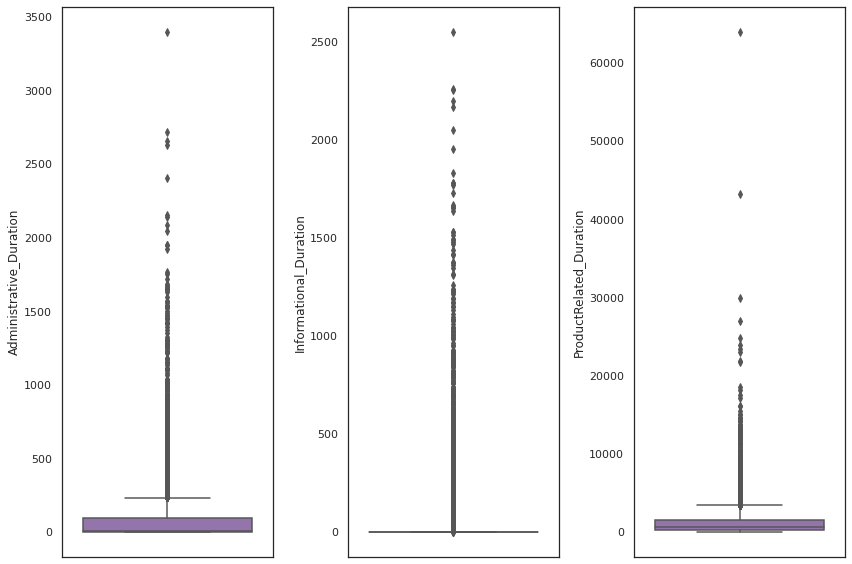

In [8]:
sns.set(style="white", palette="muted", color_codes=True)
plt.Figure(dpi=300)
for i in range(0,len(lbl_dur)):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[lbl_dur[i]],color='m',orient='v')
    plt.tight_layout()

Conclusion

-----

We can see that most of the visitors spend very little time on informational pages, followed by administrative pages. Product related pages have the highest no of visits, both in terms of no of pages visited and the time spent.


#### Time of visiting

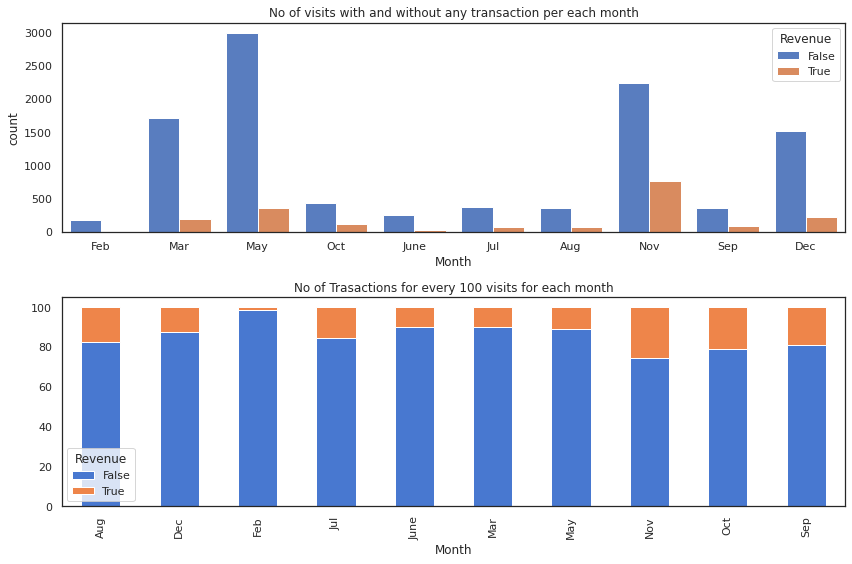

In [9]:
#Plot absolute values
fig,axes = plt.subplots(2,1)
axes[0].set_title("No of visits with and without any transaction per each month")
sns.countplot(x='Month',data=df,hue='Revenue',ax=axes[0])

#Relative Plot
month_df = df.groupby(['Month','Revenue'])['Month'].count().unstack('Revenue').fillna(0)
month_tot = month_df.sum(axis=1)
month_df = month_df.loc[:].div(month_tot,axis=0).mul(100).round(2)

axes[1].set_title("No of Trasactions for every 100 visits for each month")
month_df.plot(kind='bar',stacked=True,ax=axes[1])
plt.tight_layout()

 * We can see that most no of visits were in the months of Mar, May, Nov and December
 * Highest No of Transactions were recorded in November followed by May and December
 * Also, November also has the highest percentage of users purchasing, along with september and october

#### Special Days and Weekend

###### Percentage of Visitors performing a transaction on weekday vs weekend

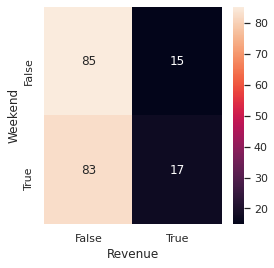

In [10]:
week_df = df.groupby(['Weekend','Revenue'])['Weekend'].count().unstack('Revenue').fillna(0)
week_tot = week_df.sum(axis=1)
week_df = week_df.loc[:].div(week_tot,axis=0).mul(100).round(2)

plt.figure(figsize=(4,4))
sns.heatmap(week_df,annot=True)

We can see that on Weekends the conversion rate for a visitor to make a purchase is slightly higher than on weekday

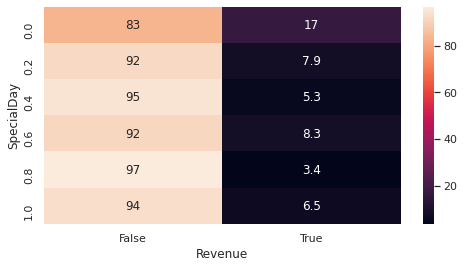

In [11]:
spl_df = df.groupby(['SpecialDay','Revenue'])['SpecialDay'].count().unstack('Revenue').fillna(0)
spl_tot = spl_df.sum(axis=1)
spl_df = spl_df.loc[:].div(spl_tot,axis=0).mul(100).round(2)

plt.figure(figsize=(8,4))
sns.heatmap(spl_df,annot=True)

The data shows that on special days the % of visitors who make a purchase is lower than on normal days

###### Metrics Analysis

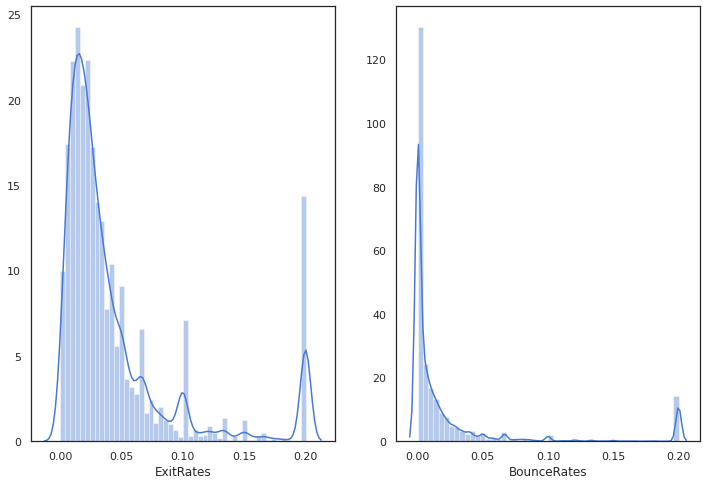

In [12]:
plt.subplot(1,2,1)
sns.distplot(df['ExitRates'])
plt.subplot(1,2,2)
sns.distplot(df['BounceRates'])

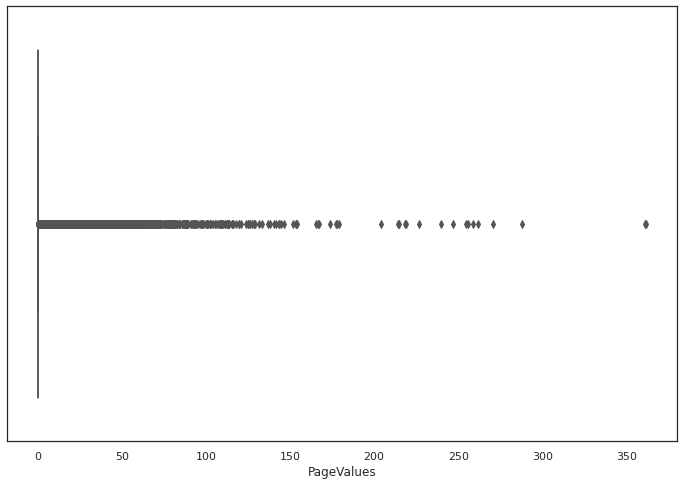

In [13]:
sns.boxplot(df['PageValues'])

##### Correlation Matrix

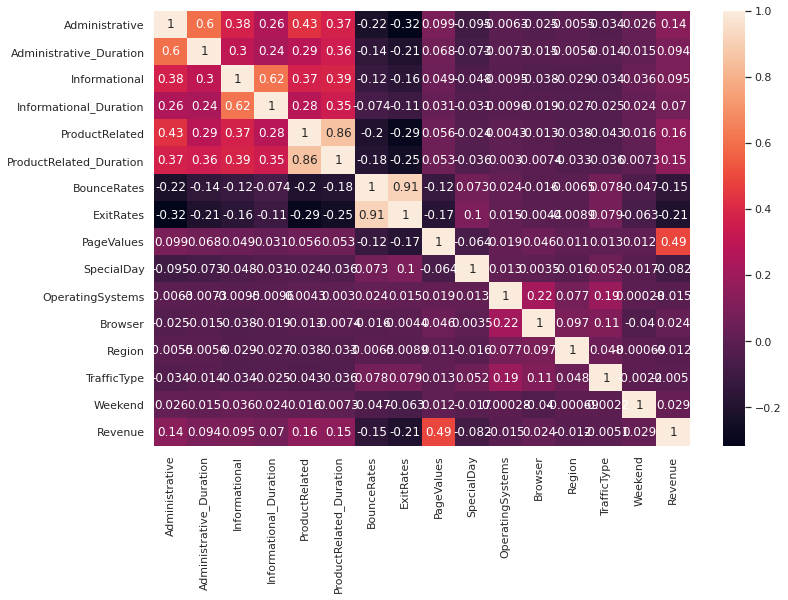

In [14]:
sns.heatmap(df.corr(),annot=True)

###### Encoding Categorical Variables

In [15]:
print(df['VisitorType'].unique())
print(df['Month'].unique())

['Returning_Visitor' 'New_Visitor' 'Other']
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


###### Encoding and dropping the VisitorType and Month Columns

In [119]:
new_df = df.copy()
mnth = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
new_df.Month = new_df.Month.map(mnth)

#One Hot Encoding the  Visitor Type Value
ohe = pd.get_dummies(df.VisitorType,prefix='VType')
new_df = new_df.drop('VisitorType',axis=1)
new_df = new_df.join(ohe)
new_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VType_New_Visitor,VType_Other,VType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,False,False,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,False,False,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,False,False,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,False,False,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,True,False,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,True,False,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,True,False,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,False,False,0,0,1


###### Finding the Best Features

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                      Specs          Score
5   ProductRelated_Duration  548628.276772
3    Informational_Duration   14668.537049
4            ProductRelated   12737.718936
17        VType_New_Visitor   10046.876897
8                PageValues    9683.278130
1   Administrative_Duration    2418.742974
18              VType_Other     504.123103
10                    Month     232.898757
2             Informational     130.134466
16                  Revenue     112.383868


### Analysing Customer patterns using Clustering

----

###### Bounce Rate and Time spent on product related pages

Bounce Rate is the percentage where users exits the website from the first page itself

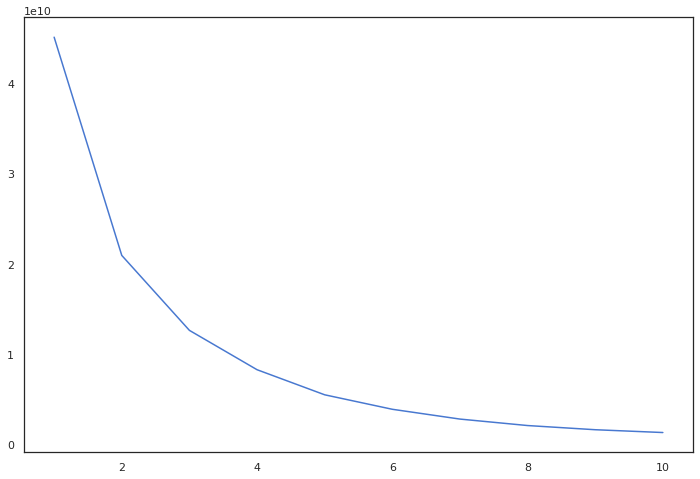

In [122]:
#K-Means clustering for BounceRates vs Product-Duration with values of k from 1 to 10
#and calculate the WCSS (Within Cluster Sum of Squares) for every value of k

X = df.iloc[:,[5,6]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)



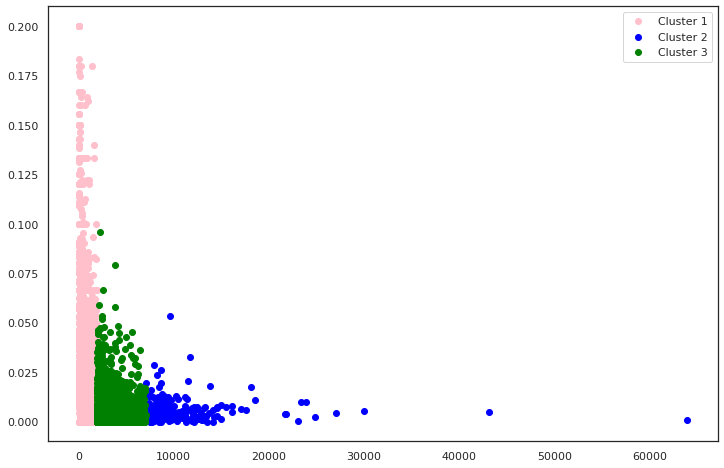

In [124]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)

plt.scatter(X[y == 0,0],X[y == 0,1],c='pink',label='Cluster 1')
plt.scatter(X[y == 1,0],X[y == 1,1],c='blue',label='Cluster 2')
plt.scatter(X[y == 2,0],X[y == 2,1],c='green',label='Cluster 3')
plt.legend()

In [83]:

for i in range(0,3):
    t = df[y == i].groupby(['Revenue']).count()
    rev_f = (t.loc[False][0])
    rev_t = (t.loc[True][0])
    
    print("Cluster ",i+1," Revenue generated by ",(rev_t/(rev_t + rev_f)*100).round(2), "% Visitors")


Cluster  1  Revenue generated by  13.23 % Visitors
Cluster  2  Revenue generated by  33.65 % Visitors
Cluster  3  Revenue generated by  25.09 % Visitors


###### Time spent on administrative pages vs Bounce Rate

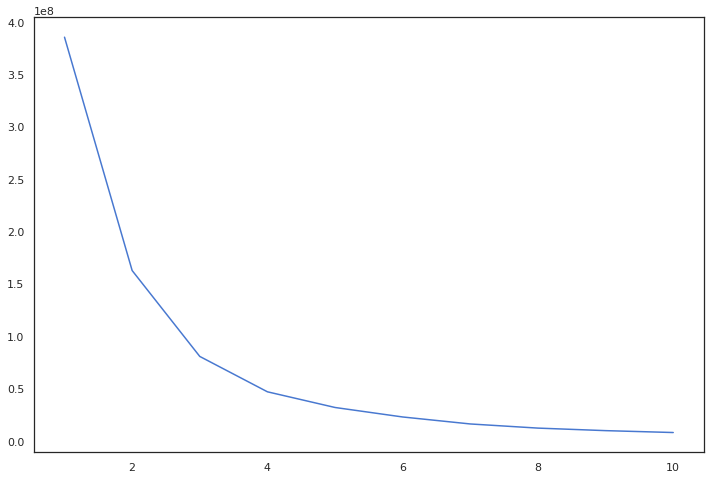

In [125]:
#K-Means clustering for BounceRates vs Product-Duration with values of k from 1 to 10
#and calculate the WCSS (Within Cluster Sum of Squares) for every value of k

X = df.iloc[:,[1,6]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)



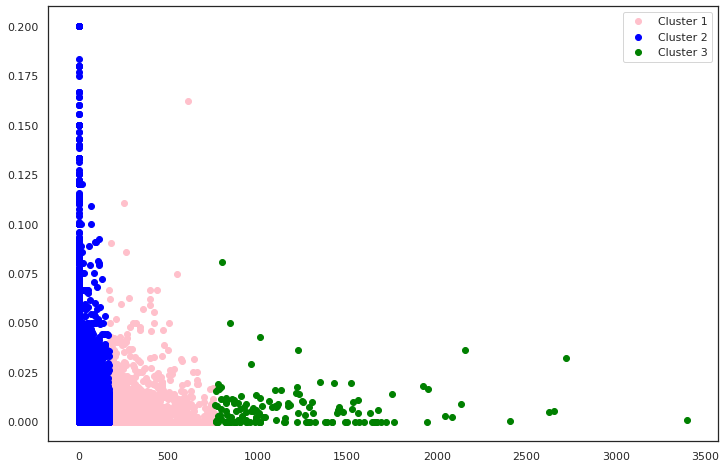

In [126]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)

plt.scatter(X[y == 0,0],X[y == 0,1],c='pink',label='Cluster 1')
plt.scatter(X[y == 1,0],X[y == 1,1],c='blue',label='Cluster 2')
plt.scatter(X[y == 2,0],X[y == 2,1],c='green',label='Cluster 3')
plt.legend()

In [127]:

for i in range(0,3):
    t = df[y == i].groupby(['Revenue']).count()
    rev_f = (t.loc[False][0])
    rev_t = (t.loc[True][0])
    
    print("Cluster ",i+1," Revenue generated by ",(rev_t/(rev_t + rev_f)*100).round(2), "% Visitors")


Cluster  1  Revenue generated by  24.24 % Visitors
Cluster  2  Revenue generated by  14.09 % Visitors
Cluster  3  Revenue generated by  21.57 % Visitors


#### Product Duration vs
    ##### Bounce Rate
    ##### Page Value
    ##### Exit Rate


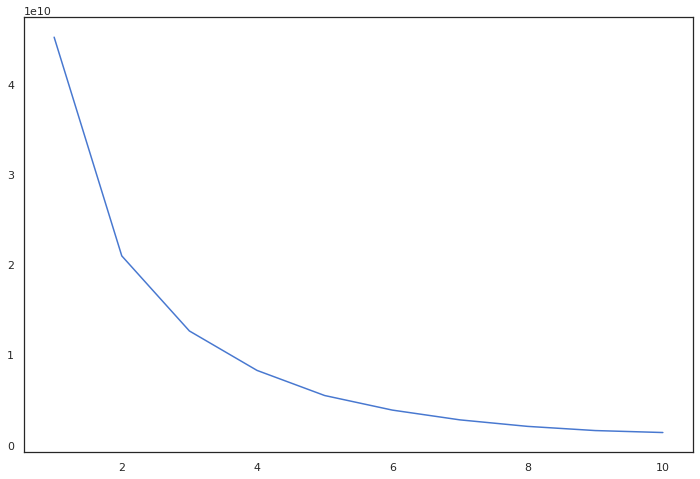

In [128]:
#K-Means clustering for BounceRates vs Product-Duration with values of k from 1 to 10
#and calculate the WCSS (Within Cluster Sum of Squares) for every value of k

X = df.iloc[:,[5,6,7,8]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)



In [133]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)

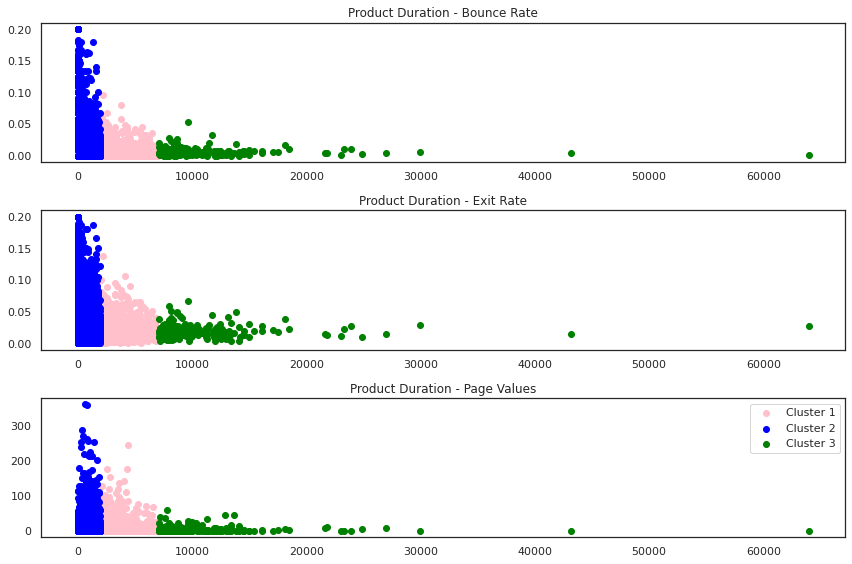

In [142]:
plt.subplot(3,1,1)
plt.title('Product Duration - Bounce Rate')
plt.scatter(X[y == 0,0],X[y == 0,1],c='pink',label='Cluster 1')
plt.scatter(X[y == 1,0],X[y == 1,1],c='blue',label='Cluster 2')
plt.scatter(X[y == 2,0],X[y == 2,1],c='green',label='Cluster 3')

plt.subplot(3,1,2)
plt.title('Product Duration - Exit Rate')
plt.scatter(X[y == 0,0],X[y == 0,2],c='pink',label='Cluster 1')
plt.scatter(X[y == 1,0],X[y == 1,2],c='blue',label='Cluster 2')
plt.scatter(X[y == 2,0],X[y == 2,2],c='green',label='Cluster 3')

plt.subplot(3,1,3)
plt.title('Product Duration - Page Values')
plt.scatter(X[y == 0,0],X[y == 0,3],c='pink',label='Cluster 1')
plt.scatter(X[y == 1,0],X[y == 1,3],c='blue',label='Cluster 2')
plt.scatter(X[y == 2,0],X[y == 2,3],c='green',label='Cluster 3')

plt.tight_layout()
plt.legend()

In [143]:

for i in range(0,3):
    t = df[y == i].groupby(['Revenue']).count()
    rev_f = (t.loc[False][0])
    rev_t = (t.loc[True][0])
    
    print("Cluster ",i+1," Revenue generated by ",(rev_t/(rev_t + rev_f)*100).round(2), "% Visitors")


Cluster  1  Revenue generated by  25.19 % Visitors
Cluster  2  Revenue generated by  13.2 % Visitors
Cluster  3  Revenue generated by  33.81 % Visitors


# Conclusion

----

### By visualizing the various clusters, we can broadly divide the customers into three categories

  * A - Who are most likely to purchase
  * B - General Visitors who may or may not purchase anything
  * C - Casual Visitors who are not likely to purchase anything
  
 ##### Customers who spend more time on product related pages, and have a lower bounce-rate and exit-rate belongs to class A whereas customers with high to very high bounce rates tend to spend little time and also visit less no of pages, and are thus not likely to generate any revenue